In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier

In [8]:
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv('income_evaluation.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
df = df.drop_duplicates()

In [9]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [7]:
for i in df.columns:
    print(df[i].value_counts())

36    898
31    888
34    886
23    876
33    875
35    875
28    866
30    860
37    858
25    838
27    834
32    828
38    826
39    815
29    813
41    808
24    798
40    794
26    785
42    779
43    770
22    765
20    752
46    735
45    734
44    723
21    718
47    708
19    708
50    602
     ... 
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     42
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64
123011     13
164190     13
203488     13
113364     12
148995     12
126675    

In [43]:
df['workclass'].replace(' ?', np.NaN, inplace=True)
df['occupation'].replace(' ?', np.NaN, inplace=True)
df['native_country'].replace(' ?', np.NaN, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
age               32537 non-null int64
workclass         32537 non-null object
fnlwgt            32537 non-null int64
education         32537 non-null object
education_num     32537 non-null int64
marital_status    32537 non-null object
occupation        32537 non-null object
relationship      32537 non-null object
race              32537 non-null object
sex               32537 non-null object
capital_gain      32537 non-null int64
capital_loss      32537 non-null int64
hours_per_week    32537 non-null int64
native_country    32537 non-null object
income            32537 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [98]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32537,NaN,NaN,NaN,38.5855,13.638,17,28,37,48,90
workclass,30701,8,Private,22673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32537,NaN,NaN,NaN,189781,105556,12285,117827,178356,236993,1.48470e+06
education,32537,16,HS-grad,10494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,32537,NaN,NaN,NaN,10.0818,2.57163,1,9,10,12,16
marital_status,32537,7,Married-civ-spouse,14970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,30694,14,Prof-specialty,4136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32537,6,Husband,13187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32537,5,White,27795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32537,2,Male,21775,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
assert pd.notnull(df).all().all()

In [18]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [19]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [46]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     582
income               0
dtype: int64

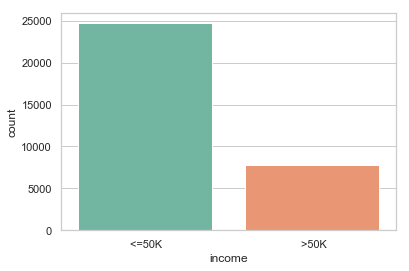

In [24]:
sns.countplot(x="income", data=df, palette="Set2")

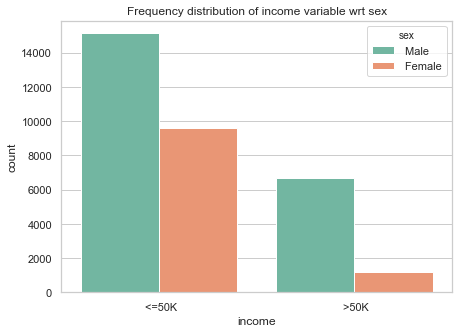

In [28]:
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(x="income", hue="sex", data=df, palette="Set2")
ax.set_title("Frequency distribution of income variable wrt sex")
plt.show()

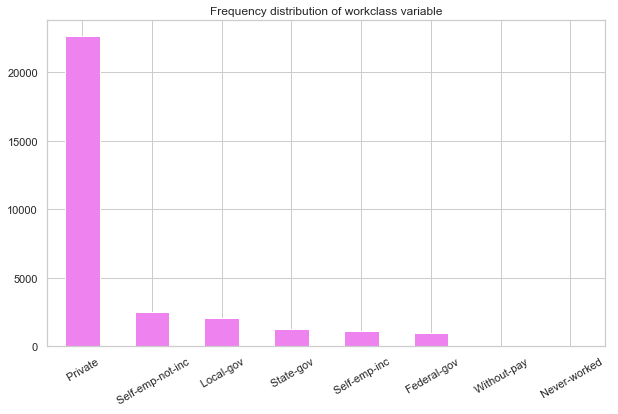

In [31]:
f, ax = plt.subplots(figsize=(10, 6))
ax = df.workclass.value_counts().plot(kind="bar", color="violet")
ax.set_title("Frequency distribution of workclass variable")
ax.set_xticklabels(df.workclass.value_counts().index, rotation=30)
plt.show()

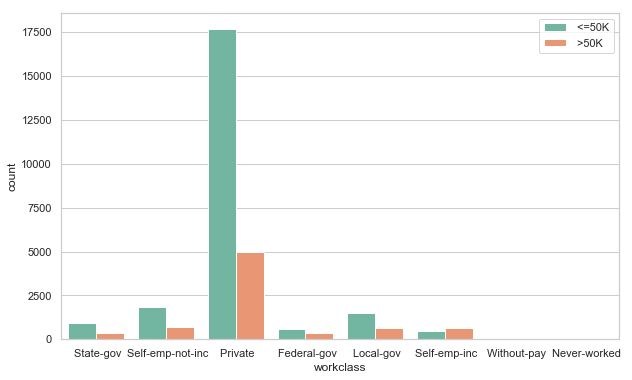

In [38]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x="workclass", hue="income", data=df, palette="Set2")
ax.legend(loc='upper right')
plt.show()

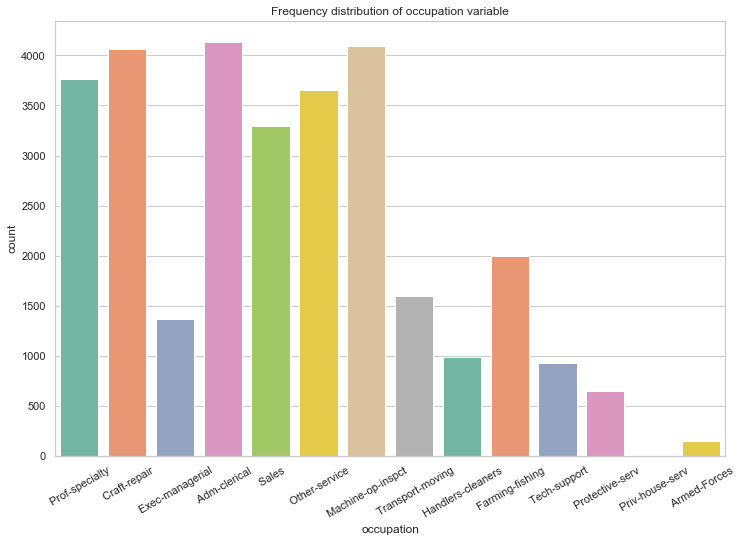

In [42]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="occupation", data=df, palette="Set2")
ax.set_title("Frequency distribution of occupation variable")
ax.set_xticklabels(df.occupation.value_counts().index, rotation=30)
plt.show()

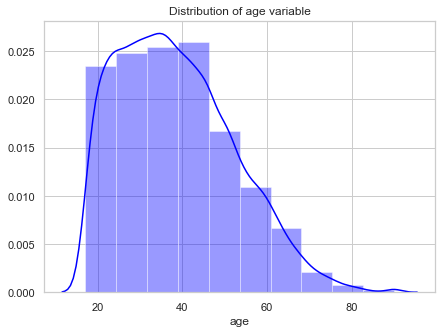

In [49]:
f, ax = plt.subplots(figsize=(7,5))
x = df['age']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

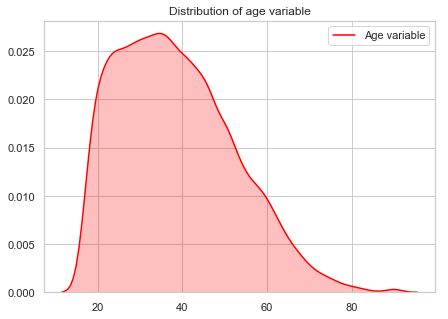

In [50]:
f, ax = plt.subplots(figsize=(7,5))
x = df['age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='red')
ax.set_title("Distribution of age variable")
plt.show()

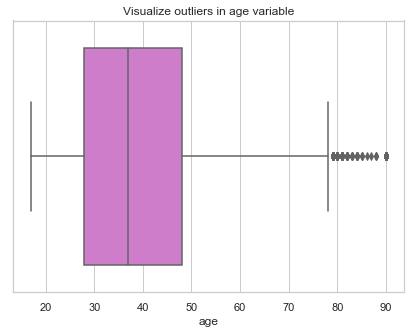

In [56]:
f, ax = plt.subplots(figsize=(7,5))
x = df['age']
ax = sns.boxplot(x, color = 'orchid')
ax.set_title("Visualize outliers in age variable")
plt.show()

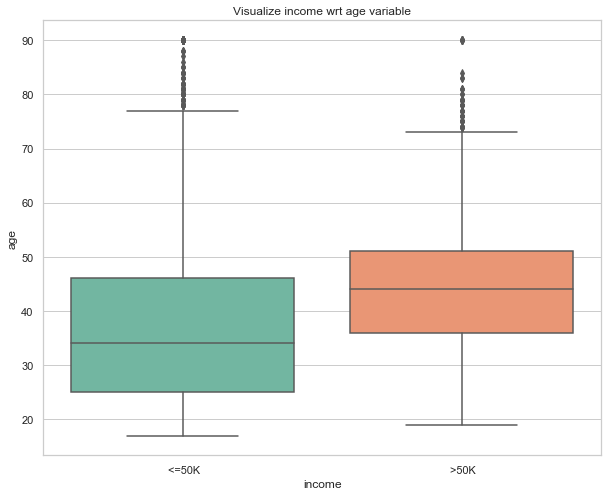

In [58]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", data=df, palette = 'Set2')
ax.set_title("Visualize income wrt age variable")
plt.show()

In [69]:
df.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('twilight'), axis=1)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.0,-0.07645,0.03622,0.07768,0.05775,0.06851
fnlwgt,-0.07645,1.0,-0.04339,0.0004286,-0.01026,-0.0189
education_num,0.03622,-0.04339,1.0,0.1227,0.07989,0.1484
capital_gain,0.07768,0.0004286,0.1227,1.0,-0.03164,0.07841
capital_loss,0.05775,-0.01026,0.07989,-0.03164,1.0,0.05423
hours_per_week,0.06851,-0.0189,0.1484,0.07841,0.05423,1.0


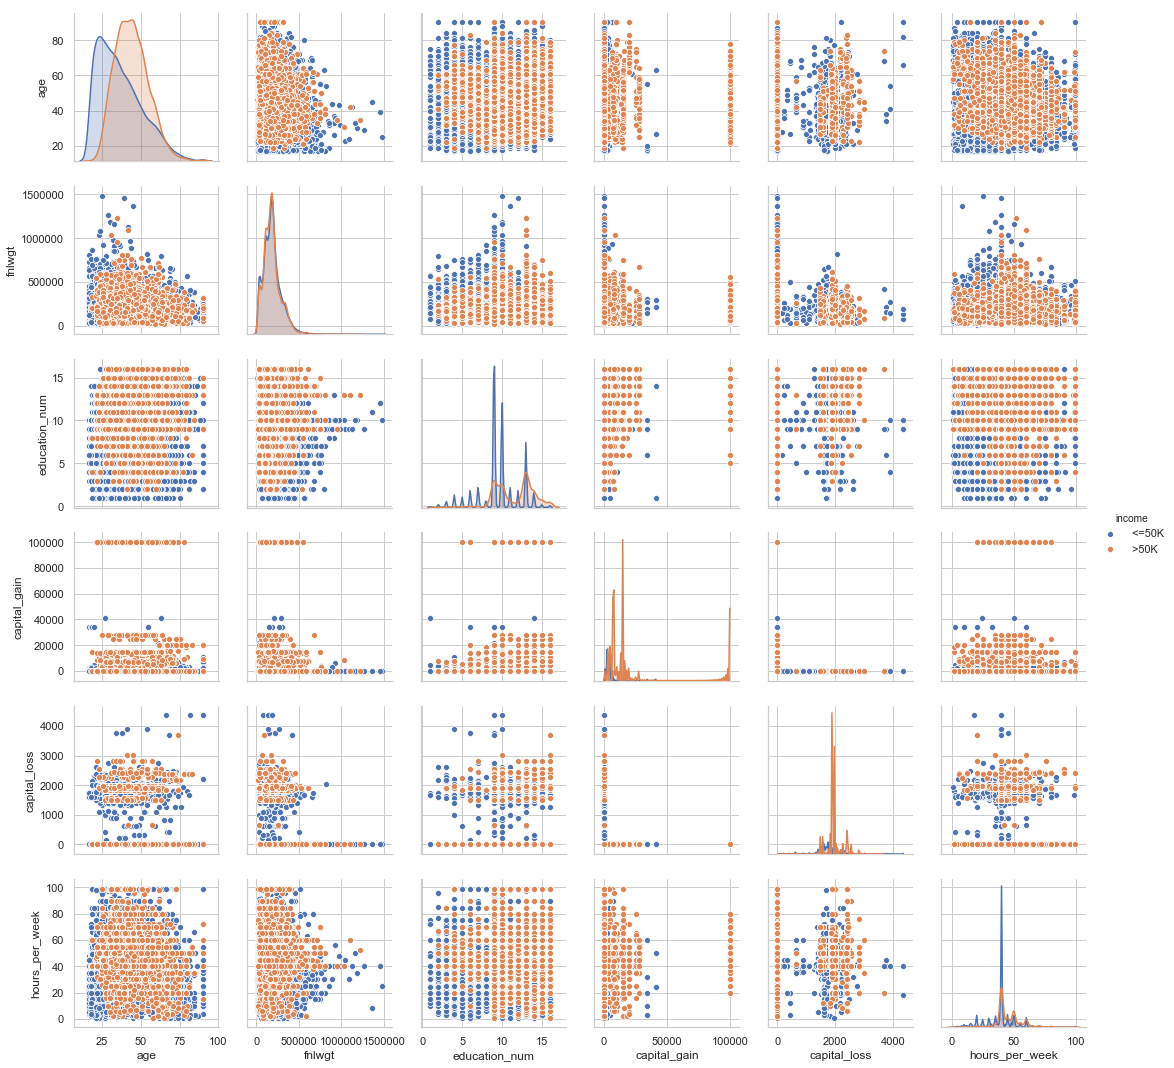

In [68]:
sns.pairplot(df, hue="income")
plt.show()

Categorical and numerical variables

In [72]:
X = df.drop(['income'], axis=1)

y = df['income']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [74]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [75]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [76]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)    

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [77]:
X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [80]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [85]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.8563


In [88]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

fnlwgt               0.160060
age                  0.147577
capital_gain         0.088455
hours_per_week       0.087383
marital_status_2     0.069845
education_num        0.062176
relationship_3       0.044198
capital_loss         0.029416
marital_status_1     0.020156
occupation_11        0.019799
occupation_9         0.016248
workclass_1          0.011471
sex_2                0.011306
education_1          0.011127
relationship_2       0.010218
relationship_5       0.009546
education_4          0.008598
workclass_6          0.008542
education_5          0.008328
occupation_6         0.008305
sex_1                0.008035
relationship_1       0.007861
occupation_2         0.007575
occupation_3         0.007217
race_1               0.006758
workclass_2          0.006252
workclass_3          0.006021
occupation_5         0.005932
education_2          0.005878
native_country_1     0.005554
                       ...   
native_country_21    0.000359
native_country_32    0.000358
native_cou

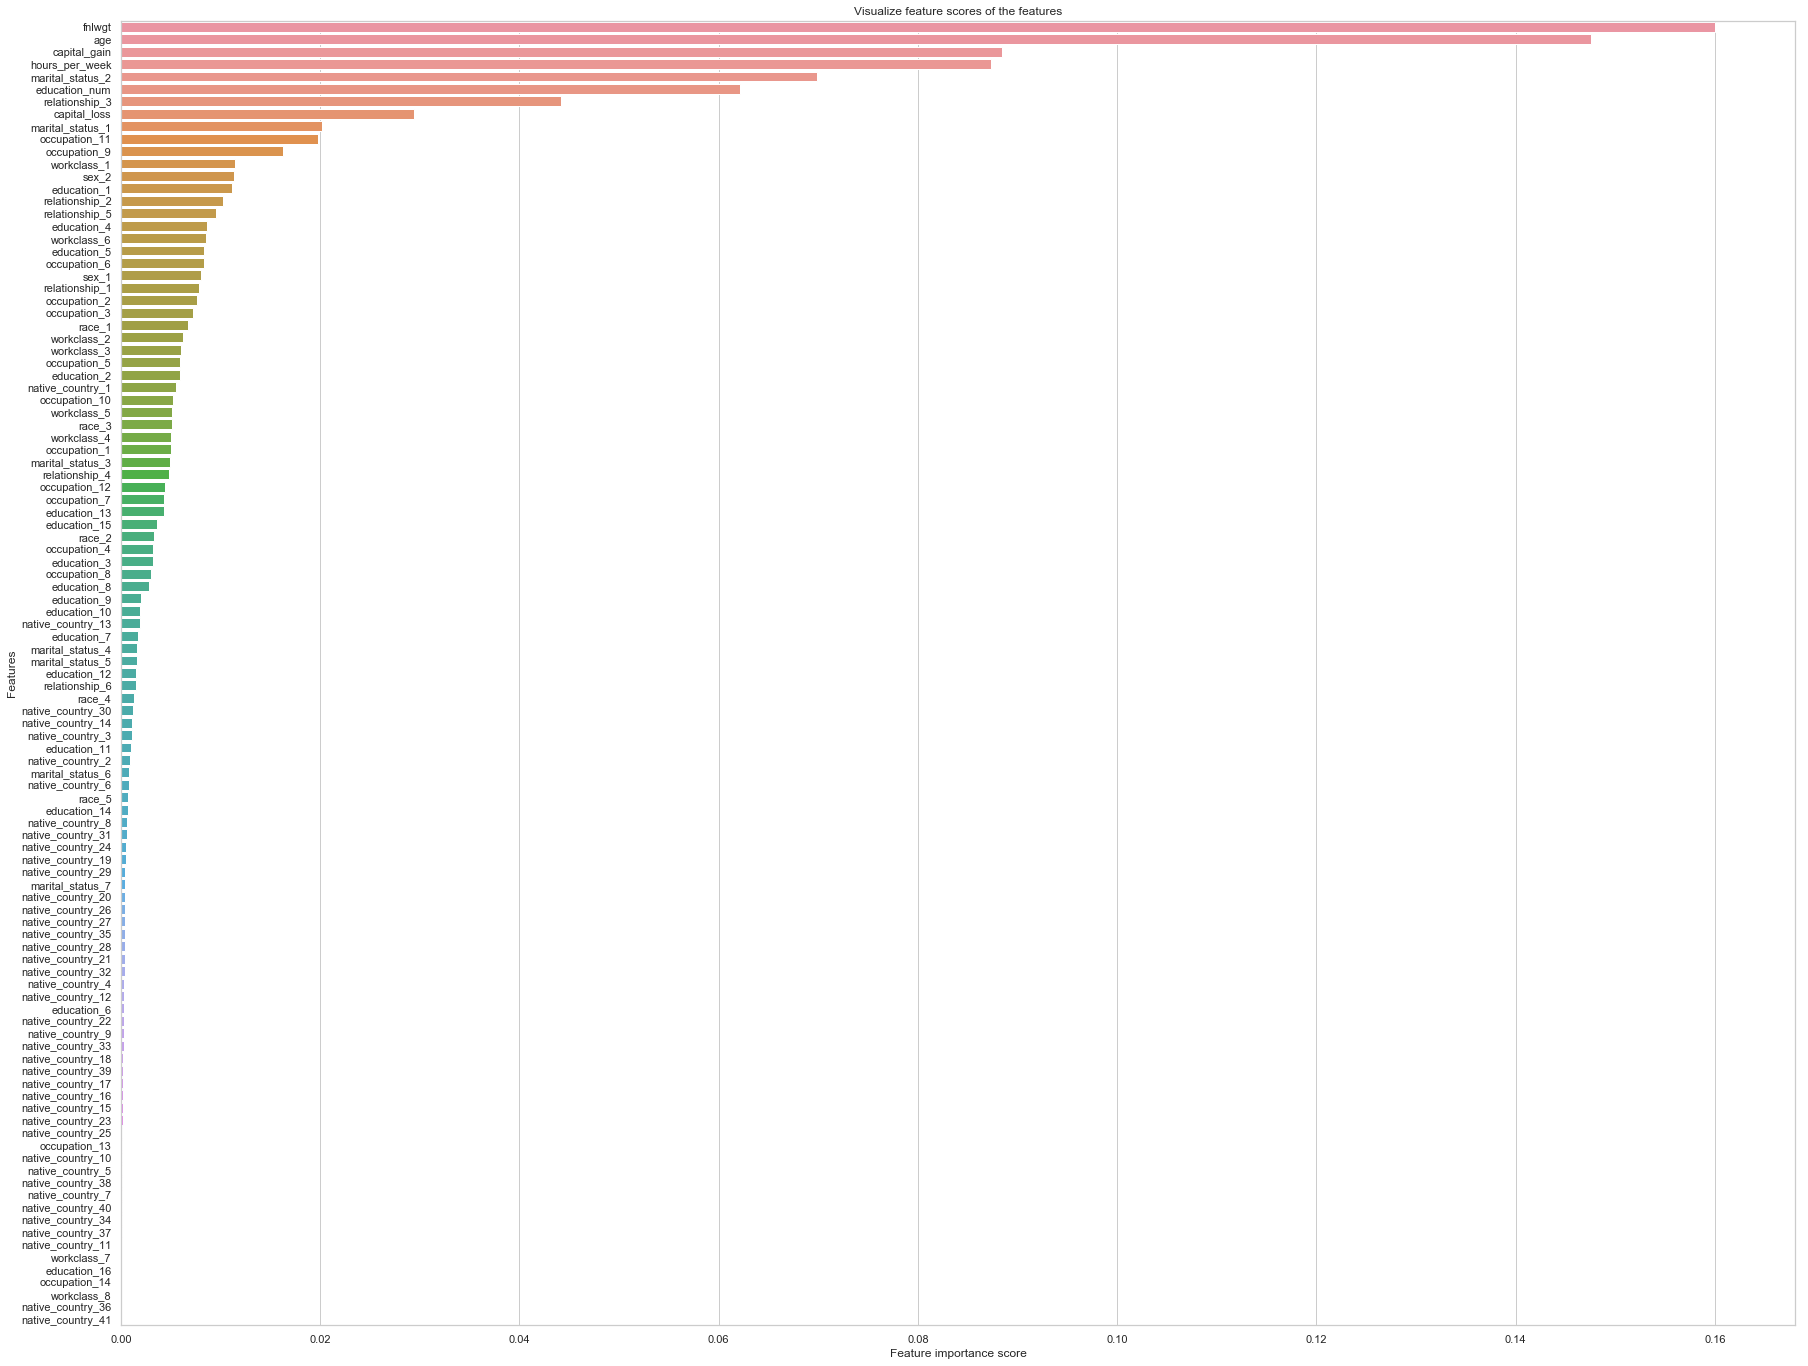

In [89]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [90]:
X_train = X_train.drop(['native_country_41'], axis=1)

X_test = X_test.drop(['native_country_41'], axis=1)

In [92]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[6817  528]
 [ 896 1521]]


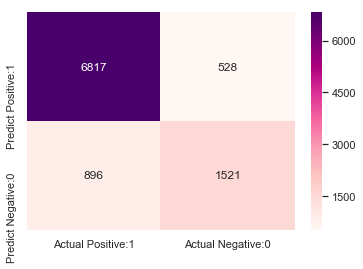

In [96]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdPu')

In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7345
        >50K       0.74      0.63      0.68      2417

   micro avg       0.85      0.85      0.85      9762
   macro avg       0.81      0.78      0.79      9762
weighted avg       0.85      0.85      0.85      9762

